<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/1007%EA%B8%88%EA%B3%BC%EC%A0%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C(132_145).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사이킷런으로 수행하는 타이타닉 생존자 예측

## 1. 데이터 내려받기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
# 데이터 내려받기
titanic_df = pd.read_csv("/content/drive/MyDrive/PyColab_ESAA/데이터셋/titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
print("## 학습 데이터 정보 ## \n")
print(titanic_df.info())

## 학습 데이터 정보 ## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## 2. 데이터 전처리

In [8]:
# 결측치 확인
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic_df[ (titanic_df['Age'].isna()) |(titanic_df['Cabin'].isna()) | (titanic_df['Embarked'].isna()) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [21]:
# 결측치 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna("N", inplace=True)
titanic_df['Embarked'].fillna("N", inplace=True)

print("데이터 세트 Null 개수 ", titanic_df.isnull().sum().sum())

데이터 세트 Null 개수  0


In [24]:
# 문자열 feature의 값 분류
print('Sex 값 분포 \n', titanic_df['Sex'].value_counts())
print('\nEmbarked 값 분포 \n', titanic_df['Embarked'].value_counts())
print('\nCabin 값 분포 \n', titanic_df['Cabin'].value_counts())
## 선실의 경우, N이 제일 많고, C23 C25 C27이 한꺼번에 표기

Sex 값 분포
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [25]:
# Cabin 전처리
## 선실 등급을 나타내는 첫번째 알파벳이 중요하므로, 앞문자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(5))

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


## 3. 데이터 탐색 및 분석

### 1) 어떤 유형의 승객이 생존 확률이 높았는지 확인
      * Survived = 1 (생존)
      * Survived = 0 (사망)

#### a) 성별에 따른 생존자수

In [26]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

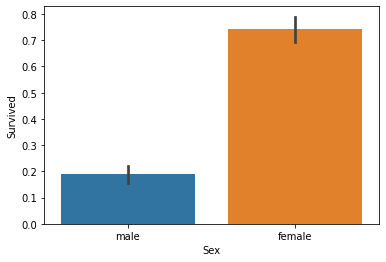

In [27]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

* 여자의 생존율이 남자의 생존율보다 더 높다.

#### b) 객실 등급에 따른 생존자수
      * Pclass = 1 (1등실)
      * Pclass = 2 (2등실)
      * Pclass = 3 (3등실)

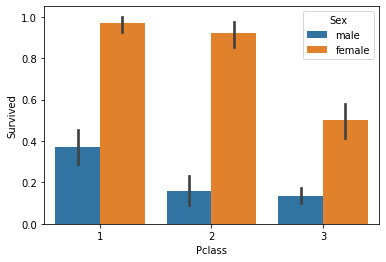

In [28]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

* 여성과 남성 모두, 등실 등급이 좋을수록 생존율이 높아진다. 
* 여성의 경우, 1등실 2등실에 따른 생존확률의 차이는 크지 않으나, 3등실의 생존확률이 상대적으로 많이 떨어진다. 
* 남성의 경우 1등실의 생존확률이 2등실 3등실의 생존확률보다 월등히 높다.

#### d) 나이에 따른 생존확률

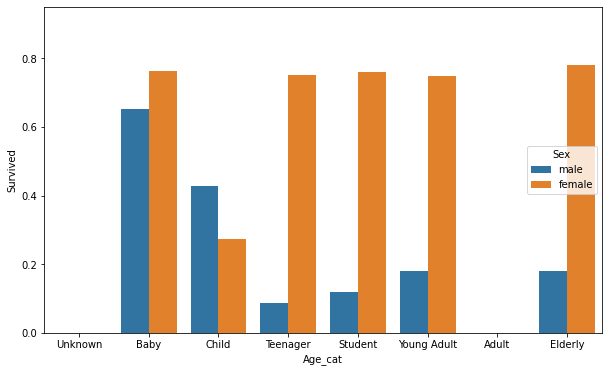

In [35]:
# 나이 범위별로 분류해 카테고리 값을 할당해주기

## 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용
def get_category(age):
  cat = ''
  if age<= -1: cat = 'Unknown'
  elif age<= 5: cat='Baby'
  elif age<=12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  else: cat='Elderly'

  return cat

## 막대그래프의 크기 figure를 더크게 설정
plt.figure(figsize=(10,6))

## X축의 값을 순차적으로 표시하기 위한 설정
age_order = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

## lambda 식에 위에서 생성한 함수를 반환값으로 지정
## get_cat(X)는 입력값으로 'Age'칼럼 값을 받아서 해당cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=age_order, errwidth=0)
titanic_df.drop('Age_cat', axis=1, inplace=True)

* 여자 child의 경우는 다른 연령대에 비해 생존 확률이 낮다.
* 여자 Elderly는 남자 Elderly와 비교했을 때 상대적으로 매우 생존 확률이 높았다. 


## 4. 예측 수행

### 1) 문자열 카테고리 feature를 숫자형 카테고리 feature로 변환하기

In [36]:
from sklearn import preprocessing

In [37]:
def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder() 
    # 카테고리 값의 유형수에 따라 숫자값으로 변환하는 객체 생성
    le = le.fit(dataDF[feature]) 
    # fit():데이터를 학습시키는 메소드, le객체를 dataDF[feature]에 학습시킨다.
    dataDF[feature] = le.transform(dataDF[feature])
    # transform():학습시킨것을 적용하는 메소드, 학습후적용한 결과를 DF에 넣어서 변화시킨다.
  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()
## 'Cabin', 'Sex', 'Embarked' 열들의 카테고리값이 숫자값으로 변환됨

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


### 2) feature 가공하는 과정을 함수로 만들기

In [38]:
#Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [46]:
# 위에서 생성한 함수를 이용해 원본데이터셋 가공

## 원본데이터를 재로딩하고, feature 데이터셋과 label 데이터셋 추출
## 생존자 -> 결정값, label, Y
## 생존자 외 -> feature, X
titanic_df = pd.read_csv("/content/drive/MyDrive/PyColab_ESAA/데이터셋/titanic_train.csv")
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(x_titanic_df)

### 3) 타이타닉 생존자 예측하기


#### a) 결정트리, 랜덤포레스트, 로지스틱회귀 알고리즘을 이용해 학습/예측/평가

In [47]:
# 학습 데이터셋, 훈련 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
# 결정트리, 랜덤포레스트, 로지스틱회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱회귀 학습 예측 평가
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('로지스틱회귀 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

결정트리 정확도: 0.7877
랜덤포레스트 정확도: 0.8547
로지스틱회귀 정확도: 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


* 로지스틱 회귀가 타 알고리즘에 비해 높은 정확도  
  (나는 랜덤포레스트가 더 높은 정확도로 나옴)
* 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분치 않아서  
  어떤 알고리즘이 가장 성능이 좋다고 평가할 수 없음

#### b) 교차검증으로 결정트리 모델을 좀 더 평가

In [49]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  #폴드 세트를 5개인 KFold객체 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
  kfold=KFold(n_splits=folds)
  scores=[]

  #Kfold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test=X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test=y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    #Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

  #5개 fold에서의 평균 정확도 계산
  mean_score=np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))
#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


* 더 간단하게 cross_val_score() 이용해서

In [50]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


* 위 K폴드의 평균 정확도는 78.23%
* 이번 cross_val_score은 Straitified폴드를 이용해 평균정확도는 78.79%로 조금 다르다.

#### c) GridSearchCV를 이용해 결정트리의 최적 하이퍼 파라미터를 찾고 예측

In [51]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
            'min_samples_split':[2,3,5],
            'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


* 예측 정확도가 87.15%로 향상되었다. 
* 테스트 데이터셋이 작기 때문에 수치상으론 예측 성능이 많이 증가한것처럼 보이나, 일반적으로 이정도 수준으로 증가하기는 매우 어렵다. 